In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Kuramoto model
$$ \dot \varphi_i = \omega_i + \frac K N \sum_{j=1}^N{a_{ij}}\sin(\varphi_j - \varphi_i)$$

0.1018
(2000,)


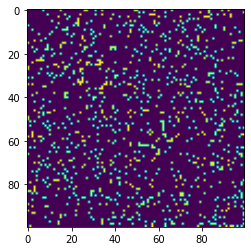

In [64]:
#define all needed variables
N = 100
phi = np.zeros(N)
omega = np.random.uniform(low=-1, high=1, size=(N))
# omega = omega**3 - 0.3*omega
K = 9.5

def make_A(N, p = 1):
    #make an adjaceny matrix with p chance that any two give oscillators are connected. 
    #p = 1 is fully connected. 
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1,N):
            if(np.random.uniform() < p):
                A[i,j] = 1
                A[j,i] = 1
    return A

# A = np.ones((N,N)) - np.eye(N) #this is all to all right now, but want to make it so you can set the number of connections
A = make_A(N, p = 0.1)
print(np.sum(A)/(N**2))
plt.figure()
plt.imshow(A)
dt = 0.01 #timestep size, if this is too large, weird things seem to be happening
T_max = 20 #maximum time to run simulation for
t = np.arange(0, T_max, dt)
print(t.shape)

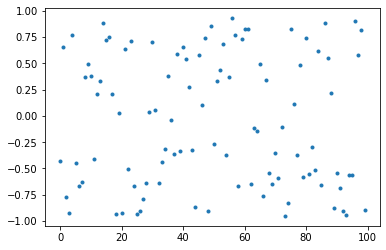

In [65]:
plt.plot(omega, '.')

In [66]:
def phi_dot(phi, t, omega, K):
    N = len(phi)
    dphi_dt = np.zeros(np.shape(phi))
    for i in range(N):
        dphi_dt[i] = omega[i] + K/N *np.sum(A[i]@np.sin(phi - phi[i]))
    return dphi_dt

print(phi_dot(phi, 0, omega, K))

[-0.42572836  0.65196522 -0.77550319 -0.92494129  0.77033376 -0.44506682
 -0.66553691 -0.63095882  0.36788783  0.49127585  0.37639579 -0.4092634
  0.20396733  0.33325636  0.88815317  0.72002995  0.74856847  0.20778239
 -0.93872419  0.03159351 -0.92016967  0.63461188 -0.50402386  0.71535437
 -0.67075292 -0.93178463 -0.91004374 -0.79109197 -0.63952045  0.03818019
  0.70478639  0.05704432 -0.63637291 -0.43794293 -0.31508466  0.37881639
 -0.03549163 -0.36755454  0.58526234 -0.33770536  0.6570866   0.54290654
  0.27859512 -0.32011625 -0.86496208  0.57483434  0.09897239  0.7393463
 -0.90432285  0.85699359 -0.27036997  0.33013187  0.43670671  0.68245065
 -0.37603158  0.3690066   0.92939978  0.77452064 -0.6651541   0.73361792
  0.82443183  0.82901922 -0.6473319  -0.11235031 -0.14704152  0.4893071
 -0.76358794  0.34038658 -0.54249494 -0.64383671 -0.34866522 -0.592627
 -0.10428552 -0.95220962 -0.82853111  0.82575027  0.10990123 -0.37292698
  0.48569383 -0.57867584  0.74055893 -0.55793476 -0.2956

[-12.73201905  11.99515423 -13.11093151 -14.13440263  11.88497086
 -10.19624996 -12.89974326 -13.322832     9.83433147   5.44991867
  11.82235207 -10.53230312   6.27123746  10.38670989  16.82393119
  15.70948958  15.99195831   2.95379987 -14.95486378  -0.97664868
 -14.75998047  11.04135768 -12.61814716  12.35593962 -12.58589821
 -13.87860918 -14.10271184 -12.87379748 -12.30679026  -7.44675149
  11.67284501  -1.09140473 -11.66241517 -12.05782059  -3.11989228
  10.30864356  -2.44923288  -8.76890284  11.38130212 -11.51383839
  11.66967243  11.69251071   7.23329431  -9.31519885 -13.38486842
   9.75761435   5.79689248  12.66221106 -15.79187428  12.61844708
  -9.26561095   5.21038522   8.06436997  11.67450902 -10.40985554
   7.69790516  13.73250941  12.73888702 -12.87866823  15.96676595
  12.73273817  19.34437499 -12.58359679  -1.31532152  -2.72376964
  11.81488467 -13.05679078  10.70102222 -12.1941743  -13.83066133
 -11.00641928 -13.10619317  -2.30982676 -16.37734815 -13.94481301
  16.41567

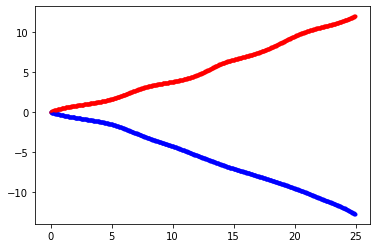

In [67]:
n_timestep = 500
dt = 0.05
t = 0
phi = np.zeros(N)
for i in range(n_timestep):
    phi += phi_dot(phi, t, omega, K)*dt
#     print(phi)
#     for j in range(len(phi)):
#         if(phi[j]<0):
#             phi[j] += 2*np.pi
#         if(phi[j]>(2*np.pi)):
#             phi[j] -= 2*np.pi
    plt.plot(t, phi[0], 'b.')
    plt.plot(t, phi[1], 'r.')
    t += dt
print(phi)

In [68]:
#do the integration part
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K))

(400, 100)


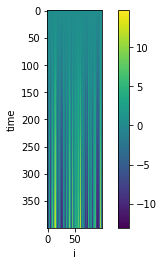

In [69]:
print(sol.shape)
plt.imshow(sol)
plt.xlabel("i")
plt.ylabel("time")
plt.colorbar()

-0.04645656816842112


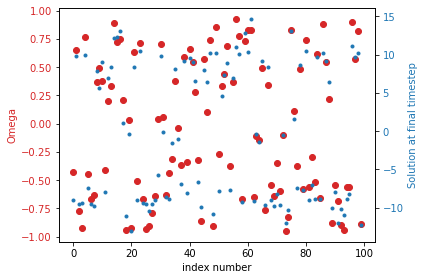

In [70]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('index number')
ax1.set_ylabel('Omega', color=color)
# omega_test = omega +np.random.uniform(0,1, size = (omega.shape))
ax1.plot(omega, 'o', color=color,linewidth=7.0)
print(np.mean(omega))
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Solution at final timestep', color=color)  # we already handled the x-label with ax1
ax2.plot(sol[-1,:], '.', color=color, linewidth=2.0)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

(400, 100)
-0.04645656816842112


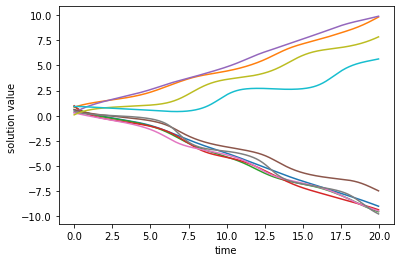

In [89]:
print(sol.shape)
# plt.plot(np.sin(sol[:,0]))
# plt.plot(sol[:,0])
# plt.plot(sol[:,1])
# plt.plot(sol[:,2])
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")

# plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

print(np.mean(omega))
# plt.plot(np.sin(sol[:,1]))
# plt.plot(np.sin(sol[:,2]))

In [72]:
u, s, vh = np.linalg.svd(sol)

[9.83129053e+02 6.53587404e+01 3.35333844e+01 2.45766704e+01
 1.96407332e+01 1.70705940e+01 1.39904184e+01 8.78891680e+00
 4.63844190e+00 2.95049511e+00 2.08070917e+00 1.92238186e+00
 1.61068953e+00 1.40509681e+00 9.51239781e-01 4.96515906e-01
 3.44166387e-01 2.87017222e-01 2.16163903e-01 1.73037669e-01
 1.33037605e-01 9.51723023e-02 6.84056596e-02 5.07185608e-02
 3.07407180e-02 2.53185229e-02 2.09349392e-02 1.35958627e-02
 1.19806174e-02 1.13055393e-02 7.19099828e-03 4.25783698e-03
 3.15999880e-03 3.01742327e-03 2.22789027e-03 1.52882831e-03
 1.19040573e-03 1.07949049e-03 7.23808903e-04 6.08169907e-04
 5.32231996e-04 3.21915352e-04 2.28171697e-04 1.96958065e-04
 1.42838042e-04 1.04984427e-04 9.00350735e-05 5.66961366e-05
 4.24302448e-05 3.49139260e-05 2.02821340e-05 1.73890653e-05
 1.51555818e-05 1.26093094e-05 7.65346647e-06 5.77242204e-06
 5.62113754e-06 3.35393647e-06 2.45977896e-06 1.94727483e-06
 1.66431842e-06 1.34495830e-06 9.12847122e-07 6.58803319e-07
 6.27921392e-07 4.607232

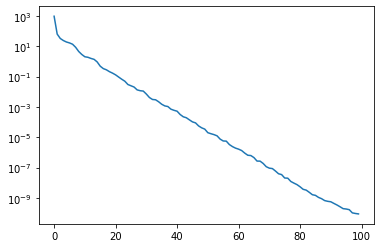

In [73]:
plt.semilogy(s)
print(s)
# plt.plot([0,100], [0,0])

In [74]:
n_important = 3

print(u[:,:n_important].shape)
print(np.diag(s[:n_important]).shape)
print(vh[:n_important,:].shape)
low_rank = (u[:,:n_important]@np.diag(s[:n_important]))@vh[:n_important, :]

(400, 3)
(3, 3)
(3, 100)


MSE error =  39.98040436980948


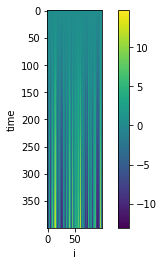

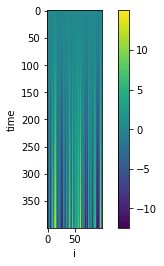

In [75]:
print("MSE error = ", np.linalg.norm(low_rank - sol))

plt.imshow(sol)
plt.xlabel("i")
plt.ylabel("time")
plt.colorbar()
plt.show()

plt.imshow(low_rank)
plt.xlabel("i")
plt.ylabel("time")
plt.colorbar()
plt.show()



In [76]:
error_list = []
for i in range(10):
    u1, s1, vh1 = np.linalg.svd(sol, full_matrices=True)
    low_rank1 = (u1[:,:i]@np.diag(s1[:i]))@vh1[:i, :]
    error_list.append(np.linalg.norm(low_rank1 - sol))

[986.6799989419329, 83.63423672307391, 52.181611751401576, 39.98040436980948, 31.534425702736243, 24.671068158141484, 17.811693466558424, 11.023820398320593, 6.654288669171343, 4.771206815391302]
[983.12905295  65.3587404   33.53338443  24.57667042  19.64073319
  17.07059401  13.99041843   8.7889168    4.6384419    2.95049511]


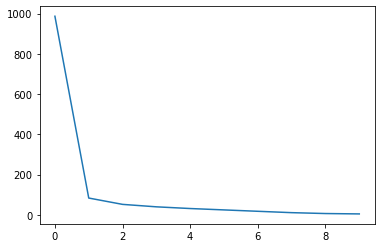

In [80]:
plt.plot(error_list)
print(error_list)
print(s[:10])
# plt.plot(s[:10])

Text(0.5, 1.0, 'first 10 phases with p = 0.1')

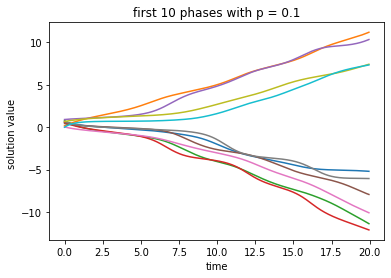

In [92]:
p = 0.1
A = make_A(N, p = p)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K))
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("first 10 phases with p = "+ str(p))

Text(0.5, 1.0, 'first 10 phases with p = 0.2')

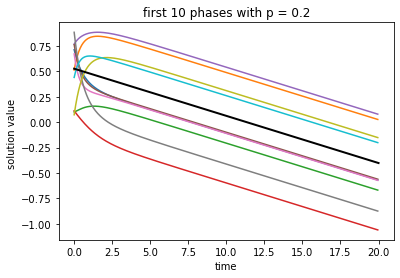

In [96]:
p = 0.2
A = make_A(N, p = p)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K))
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("first 10 phases with p = "+ str(p))

Text(0.5, 1.0, 'first 10 phases with p = 0.5')

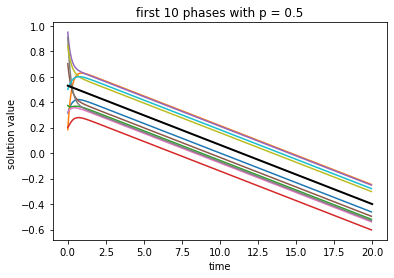

In [95]:
p = 0.5
A = make_A(N, p = p)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K))
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("first 10 phases with p = "+ str(p))

Text(0.5, 1.0, 'first 10 phases with p = 1')

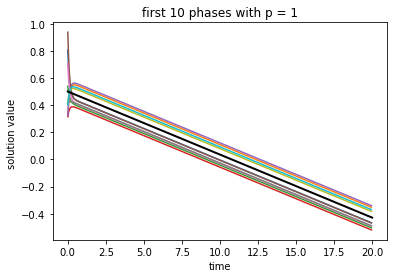

In [94]:
p = 1
A = make_A(N, p = p)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K))
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("first 10 phases with p = "+ str(p))